In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle , joblib

# some nlp lib
import nltk
from nltk.corpus import stopwords   
from nltk.stem.porter import PorterStemmer

In [2]:
## ml -- skllearn
## 

In [3]:
## reading the data frame from the file 
x , y = [] , []
## using file handling to real the file

with open("SMSSpamCollection.txt", "r") as file:
    ## reading the file line by line
    data = file.read()
    # iterate through each line 
    for data_item in data.split("\n"):
        # check if the line contain exactly two element when splitted by tab character
        if len(data_item.split("\t")) == 2:
            # append the first element to x and the second element to y
            x.append(data_item.split("\t")[1])
            y.append(data_item.split("\t")[0])
print("sucessfully read the data from the file")

sucessfully read the data from the file


In [4]:
len(x) , len(y)

(5574, 5574)

In [5]:
#3 data frame 
data_dict = {"mail_message": x, "label": y}
df = pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
# function to clean the lower case text 
def clean_text(text):
    text = re.sub('[^a-zA-Z]',' ',text) # remove special characters
    return text.lower() # convert to lower case

# apply function to entire column
df['mail_message'] = df['mail_message'].apply(clean_text)
df.head()

,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham


/var/folders/2l/v4p9mr812sz7772ddx5ybr080000gn/T/ipykernel_3114/694462785.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=classes, y=valu, kind="bar", palette="Set2")


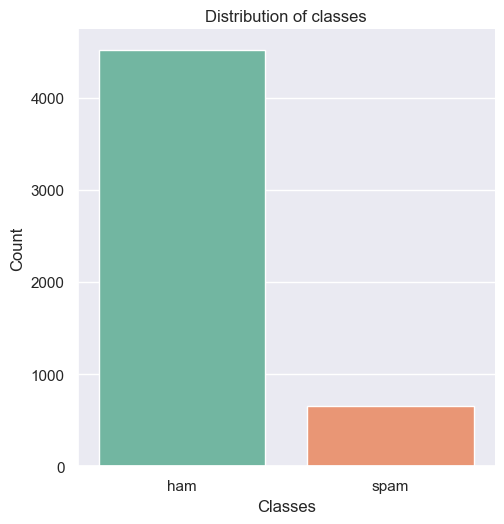

In [9]:
classes = list(df["label"].value_counts().index)
valu = list(df["label"].value_counts().values)
sns.set(rc = {'figure.figsize':(10,5)})
sns.catplot(x=classes, y=valu, kind="bar", palette="Set2")
plt.title("Distribution of classes")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [10]:
df["label"].value_counts()

label
ham     4518
spam     653
Name: count, dtype: int64

In [11]:
df.sample(2000)

,mail_message,label
2699,from lost help,spam
1857,say this slowly god i love you amp i need ...,ham
1647,thts wat wright brother did to fly,ham
4799,just come home i don t want u to be miserable,ham
4215,ard like dat lor we juz meet in mrt stati...,ham
...,...,...
3232,no plm i will come da on the way,ham
3746,aight let me know when you re gonna be around...,ham
1859,sir i am waiting for your call,ham
5130,wot about on wed nite i am then but only til,ham


In [12]:
ham = df[df["label"] == "ham"].sample(2000)
spam = df[df["label"] == "spam"]
df = pd.concat([ham, spam])
df["label"].value_counts()

label
ham     2000
spam     653
Name: count, dtype: int64

In [13]:
# label encoding of dependent variable
df["label"] = df["label"].map({"ham": 0, "spam": 1})
df.head()

,mail_message,label
861,in work now going have in few min,0
3044,your bill at is so thats not bad,0
1685,do you want bold or bb torch,0
1706,yun ah now wkg where btw if go nus sc w...,0
3821,i got arrested for possession at i shit you n...,0


In [14]:
# split the data into train and test
x = df["mail_message"]
y = df["label"]


In [15]:
# Prepare single list of values
x = x.values.tolist()

In [16]:
## initializing the bag of word class
BOW_obj = CountVectorizer(
    max_features=5000,
    stop_words="english"
)
x_transformed = BOW_obj.fit_transform(x)

x_transformed.shape

(2653, 5000)

In [17]:
## sparse to dense matrix conversion
dense_matrix = x_transformed.toarray()
dense_matrix.shape

(2653, 5000)

In [18]:
## split the data into train and test   
x_train, x_test, y_train, y_test = train_test_split(
    dense_matrix,
    y,
    test_size=0.2,
    random_state=42
)

In [19]:
## Using multinomial naive bayes
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [20]:
model.score(x_test, y_test)

0.967984934086629

In [22]:
pred = model.predict(x_test)
pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,